# Chapter 04 - Regression and Prediction

## Simple  Linear Regression

Simple linear regression estimates how much Y will change when X changes by a certain amount.

$$
Y = b_0 + b_1 X
$$

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

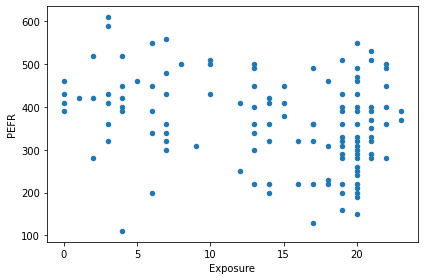

In [2]:
lung = pd.read_csv("../data/LungDisease.csv")

lung.plot.scatter(x='Exposure', y='PEFR')

plt.tight_layout()
plt.show()

In [3]:
predictors = ["Exposure"]
outcome = "PEFR"

model = LinearRegression()
model.fit(lung[predictors], lung[outcome])

print(f'Intercept: {model.intercept_:.3f}')
print(f'Coefficient Exposure: {model.coef_[0]:.3f}')

Intercept: 424.583
Coefficient Exposure: -4.185


### Fitted Values and Residuals

In [4]:
fitted = model.predict(lung[predictors])
residual = lung[outcome] - fitted

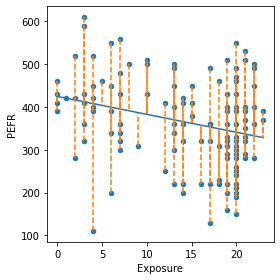

In [5]:
ax = lung.plot.scatter(x='Exposure', y='PEFR', figsize=(4, 4))
ax.plot(lung.Exposure, fitted)
for x, yactual, yfitted in zip(lung.Exposure, lung.PEFR, fitted): 
    ax.plot((x, x), (yactual, yfitted), '--', color='C1')

plt.tight_layout()
plt.show()

## Multiple Linear Regression

When we have more than one predictors, the regression equation can be written as follows:

$$
Y = b_0 + b_1X_1 + b_2X_2 + ... + b_pX_p + \epsilon
$$

In [6]:
# king county housing data
house = pd.read_csv("../data/house_sales.csv", sep='\t')

subset = ['AdjSalePrice', 'SqFtTotLiving', 'SqFtLot', 'Bathrooms', 
          'Bedrooms', 'BldgGrade']
house[subset].head()

,AdjSalePrice,SqFtTotLiving,SqFtLot,Bathrooms,Bedrooms,BldgGrade
1,300805.0,2400,9373,3.00,6,7
2,1076162.0,3764,20156,3.75,4,10
3,761805.0,2060,26036,1.75,4,8
4,442065.0,3200,8618,3.75,5,7
5,297065.0,1720,8620,1.75,4,7


In [7]:
predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 'Bedrooms', 'BldgGrade']
outcome = 'AdjSalePrice'

house_lm = LinearRegression()
house_lm.fit(house[predictors], house[outcome])

LinearRegression()

In [8]:
print(f'Intercept: {house_lm.intercept_:.3f}')
print('Coefficients:')
for name, coef in zip(predictors, house_lm.coef_):
    print(f' {name}: {coef}')

Intercept: -521871.368
Coefficients:
 SqFtTotLiving: 228.83060360240793
 SqFtLot: -0.06046682065307607
 Bathrooms: -19442.84039832106
 Bedrooms: -47769.95518521438
 BldgGrade: 106106.96307898081


### Assessing the Model

The most important metric to evaluate regression models is the **Root Mean Squared Error** (RMSE).

$$
RMSE = \sqrt{\frac{\sum_{i=1}^n (y_i - \hat{y}_i)^2}{n}}
$$

It measures the overall accuracy of the model. Another useful metric is the **Residual Standard Error** (RSE), which is computed similarly but it considers the degree of freedoms of the model.

$$
RSE = \sqrt{\frac{\sum_{i=1}^n (y_i - \hat{y}_i)^2}{n-p-1}}
$$

Another useful metric is the coefficient of determination, or **R-squared** statistics. It ranges from 0 to 1 and measures the proportion of variation in the data explained by the model.

$$
R^2 = 1 - \frac{\sum_{i=1}^n (y_i - \hat{y}_i)^2}{\sum_{i=1}^n (y_i - \bar{y}_i)^2}
$$

Along with the estimated coeffients, we can also compute a t-statistic for each coefficient. This t-statistic is then used to perform a hypothesis test where the Null hypothesis is that the coefficient is 0.

In [9]:
import statsmodels.api as sm
model = sm.OLS(house[outcome], house[predictors].assign(const=1))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AdjSalePrice   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     5338.
Date:                Fri, 01 Jul 2022   Prob (F-statistic):               0.00
Time:                        11:59:16   Log-Likelihood:            -3.1517e+05
No. Observations:               22687   AIC:                         6.304e+05
Df Residuals:                   22681   BIC:                         6.304e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
SqFtTotLiving   228.8306      3.899     58.694      0.000     221.189     236.472
SqFtLot          -0.0605      0.061     -0.988      0.323      -0.180       0.059
Bathrooms     -1.944e+04   3625.388     -5.363      0.000   -2.65e+04   -1.23e+04
Bedrooms      -4.777e+04   2489.732    -19.187      0.000   -5.27e+04   -4.29e+04
BldgGrade      1.061e+05   2396.445     44.277      0.000    1.01e+05    1.11e+05
const         -5.219e+05   1.57e+04    -33.342      0.000   -5.53e+05   -4.91e+05
==============================================================================
Omnibus:                    29676.557   Durbin-Watson:                   1.247
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         19390738.346
Skew:                           6.889   Prob(JB):                         0.00
Kurtosis:                     145.559   Cond. No.                     2.86e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.86e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Cross-Validation

Using a holdout set is important to measure the performance of the model on unseen data. However, we run the risk of sampling a biased holdout set. To mitigate such problem, we can employ Cross-Validation. 

The algoritm for k-fold cross-validation is as follows:

1. Set aside 1/k of the data as a holdout sample.
2. Train the model on the remaining data.
3. Apply (score) the model to the 1/k holdout, and record needed model assessment metrics.
4. Restore the first 1/k of the data, and set aside the next 1/k (excluding any records that got picked the first time).
5. Repeat steps 2 and 3.
6. Repeat until each record has been used in the holdout portion.
7. Average or otherwise combine the model assessment metrics.

### Model Selection and Stepwise Regression

Adding more variables, however, does not necessarily mean we have a better model. Statisticians use the principle of Occam’s razor to guide the choice of a model: all things being equal, a simpler model should be used in preference to a more complicated model.

Including additional variables always reduces RMSE and increases $R^2$ for the training data. Hence, these are not appropriate to help guide the model choice. One approach to including model complexity is to use the adjusted $R^2$:

$$
R_{adj}^2 = 1 - (1 - R^2)\frac{n-1}{n-P-1}\text{, where $n$ is the number of records and $P$ is the number of variables}
$$

Note that as n approaches infinity, the $R_{adj}^2 \rightarrow R^2$. Therefore, this is not a good option for large datasets. 

Nevertheless, we can use a metric called Akaike's Information Criteria, AIC, that penalizes adding terms to a model. In the case of regression, AIC has the form:

$$
AIC = 2P + n\log{\frac{\sum_{i=1}^n (y_i - \hat{y}_i)^2}{n}}
$$

The goal is to find the model that minimizes the AIC. Alternative metrics are: 

- **AICc**: A version of AIC corrected for small sample sizes.
- **BIC** or Bayesian Information Criteria: Similar to AIC, with a stronger penalty for including additional variables to the model.
- **Mallows Cp**: A variant of AIC developed by Colin Mallows.

In particular:

$$
BIC = P\log{n} + n\log{\frac{\sum_{i=1}^n (y_i - \hat{y}_i)^2}{n}}
$$

## Prediction Using Regression

In regression, we can comput the t-statistics and p-value for individual regressors. More useful metrics are confidence intervals. They can be computed for **regression parameters** (coefficients), and even for **individual predictions** or regression model error.

### Confidence Interval for predictors (parameters)

The step by step procedure to build confidence interval for a regression parameter is:

1. Consider each row (including outcome variable) as a single "ticket" and place all the n tickets in a box.
2. Draw a ticket at random, record the values, and replace it in the box.
3. Repeat step 2 n times; you now have one bootstrap resample.
4. Fit a regression to the bootstrap sample, and record the estimated coefficients.
5. Repeat steps 2 through 4, say, 1,000 times.
6. You now have 1,000 bootstrap values for each coefficient; find the appropriate percentiles for each one (e.g., 5th and 95th for a 90% confidence interval).

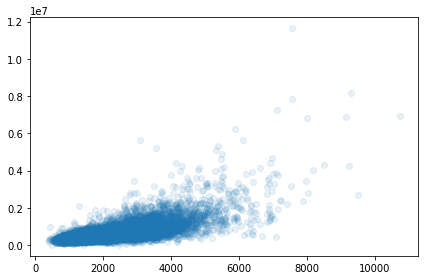

In [10]:
predictors = "SqFtTotLiving"
outcome = "AdjSalePrice"

fig, ax = plt.subplots(1, 1)

ax.scatter(house[predictors], house[outcome], alpha=0.1)

plt.tight_layout()
plt.show()

In [11]:
# 95% confidence interval for the SqFtTotLiving predictor
from sklearn.utils import resample
n_records = house.shape[0]

n_samples = 2000
n_bootstrap_samples = 1000
estimated_coefficients = []
for nrepeat in range(n_bootstrap_samples):
    sample = resample(house[[predictors, outcome]], n_samples=n_samples)
    
    house_lm = LinearRegression()
    house_lm.fit(np.array(sample[predictors]).reshape(-1, 1), sample[outcome])
    
    estimated_coefficients.append(house_lm.coef_)
    
estimated_coefficients = pd.Series([coef[0] for coef in estimated_coefficients])
avg_coef = estimated_coefficients.mean()
lower_bound, upper_bound = estimated_coefficients.quantile([0.025, 0.975])

print(f"Mean coefficient value for SqFtTotLiving: {avg_coef:.2f}")
print(f"95% Confidence Interval: [{lower_bound:.2f}, {upper_bound:.2f}]")

Mean coefficient value for SqFtTotLiving: 292.14
95% Confidence Interval: [254.47, 340.51]


In [12]:
# Coefficient computed using all the data
model = LinearRegression().fit(np.array(house[predictors]).reshape(-1, 1), house[outcome])
model.coef_

array([293.20271358])

### Confidence interval for predictions (regression model error)

The step by step procedure to build confidence interval for individual predictions is:

1. Take a bootstrap sample from the data (spelled out in greater detail earlier).
2. Fit the regression, and predict the new value.
3. Take a single residual at random from the original regression fit, add it to the predicted value, and record the result.
4. Repeat steps 1 through 3, say, 1,000 times.
5. Find the 2.5th and the 97.5th percentiles of the results.

## Factor Variables in Regression

In certain machine learning algorithms, such as nearest neighbors and tree models, one hot encoding is the standard way to represent factor variables.

In the regression setting, a factor variable with P distinct levels is usually represented by a matrix with only P – 1 columns. This is because a regression model typically includes an intercept term. With an intercept, once you have defined the values for P – 1 binaries, the value for the Pth is known and could be considered redundant. Adding the Pth column will cause a multicollinearity error.

## Interpreting the Regression Equation

In data science, when it comes to regression we focus on the actual predictions. However, interpreting the regression equation can gives valuable insights on how predictions are made. The main topics in interpreting the regression equation are:

- Correlated variables \
When the predictor variables are highly correlated, it is difficult to interpret the individual coefficients.

- Multicollinearity \
When the predictor variables have perfect, or near-perfect, correlation, the regression can be unstable or impossible to compute.

- Confounding variables \
An important predictor that, when omitted, leads to spurious relationships in a regression equation.

- Main effects \
The relationship between a predictor and the outcome variable, independent of other variables.

- Interactions \
An interdependent relationship between two or more predictors and the response.

## Regression Diagnostics

### Outliers

In regression, the standardized residual is the metric that is typically used to determine whether a record is classified as an outlier. Standardized residuals can be interpreted as "the number of standard errors away from the regression line".

In [14]:
house_98105 = house.loc[house["ZipCode"] == 98105, ]

predictors =['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 'Bedrooms', 'BldgGrade']
outcome = "AdjSalePrice"

house_outlier = sm.OLS(house_98105[outcome],
                       house_98105[predictors].assign(const=1))
result_98105 = house_outlier.fit()

In [17]:
# use OLSInfluence to analyze the residuals
from statsmodels.stats.outliers_influence import OLSInfluence

influence = OLSInfluence(result_98105)
sresiduals = influence.resid_studentized_internal
sresiduals.idxmin(), sresiduals.min()  # index of smallest residual, smallest residual value

(24333, -4.32673180407856)

Which means that the estimate is more than 4 standard deviations above the regression line, corresponding to an overestimate of \$757,754.

In [18]:
outlier = house_98105.loc[sresiduals.idxmin(), :]
print('AdjSalePrice', outlier[outcome])
print(outlier[predictors])

AdjSalePrice 119748.0
SqFtTotLiving    2900
SqFtLot          7276
Bathrooms         3.0
Bedrooms            6
BldgGrade           7
Name: 24333, dtype: object


### Influential Values

A value whose absence would significantly change the regression equation is termed an influential observation. A value whose absence would significantly change the regression equation is termed an influential observation. Furthermore, such value is considered to have high leverage on the regression.

There are several metrics to determine the influence of a value on a regression. 

- The hat-value rule:\
    values above $2 (P + 1)/n$ indicate a high-leverage data value.
- Cook's distance:\
    Defines the influence as a combination of leverage and residual size. A value has high-leverage if cook's distance exceepds $4/(n-P-1)$.
- Influence plot or bubble plot:\
    Combines standardized residuals, the hat-value, and cook's distance in a single plot.\
    The hat values are plotted on the x-axis, the residuals are plotted on the y-axis, and the size of the points is related to the value of Cook’s distance.

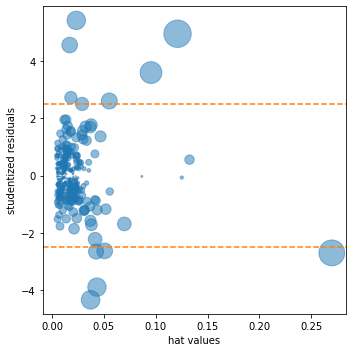

In [19]:
influence = OLSInfluence(result_98105)

fig, ax = plt.subplots(figsize=(5, 5))

ax.axhline(-2.5, linestyle='--', color='C1')
ax.axhline(2.5, linestyle='--', color='C1')
ax.scatter(influence.hat_matrix_diag, influence.resid_studentized_internal,
           s=1000 * np.sqrt(influence.cooks_distance[0]),
           alpha=0.5)

ax.set_xlabel('hat values')
ax.set_ylabel('studentized residuals')

plt.tight_layout()
plt.show()

### Heteroskedasticity, Non-Normality, and Correlated Errors

Analysis over the distribution of residuals is more important for the validity of formal statistical inference (Hypothesis tests and p-values). Normally distributed errors are a sign that the model is complete; errors that are not normally distributed indicate the model may be missing something. For formal inference to be fully valid, the residuals are assumed to be normally distributed, have the same variance, and be independent.

/home/alexandre/git/practical-statistics-notes/env-practical-statistics/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


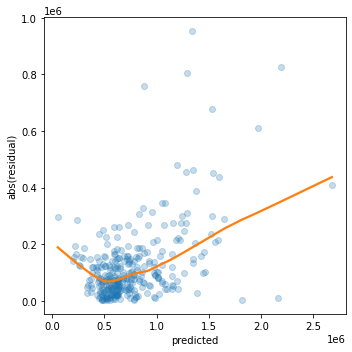

In [21]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(5, 5))

sns.regplot(result_98105.fittedvalues, np.abs(result_98105.resid),
            scatter_kws={'alpha': 0.25}, line_kws={'color': 'C1'},
            lowess=True, ax=ax)

ax.set_xlabel('predicted')
ax.set_ylabel('abs(residual)')

plt.tight_layout()
plt.show()

This plot indicates that the model has heteroskedastic errors. It may suggest an incomplete model (lack of independent variable).

### Partial Residual Plots and Nonlinearity

Partial residual plots are a way to visualize how well the estimated fit explains the relationship between a predictor and the outcome. The basic idea of a partial residual plot is to isolate the relationship between a predictor variable and the response, taking into account all of the other predictor variables. A partial residual might be thought of as a "synthetic outcome" value, combining the prediction based on a single predictor with the actual residual from the full regression equation. A partial residual for predictor $X_i$ is the ordinary residual plus the regression term associated with $X_i$:

$$
\text{Partial  residual} = \text{Residual} + \hat{b}_iX_i\text{, where $hat{b}_i$ is the estimated regression coefficient}
$$

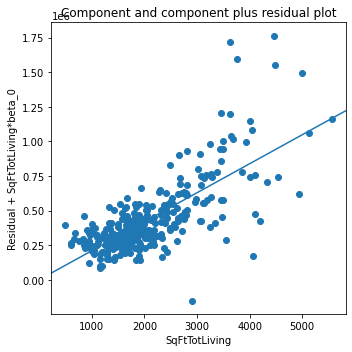

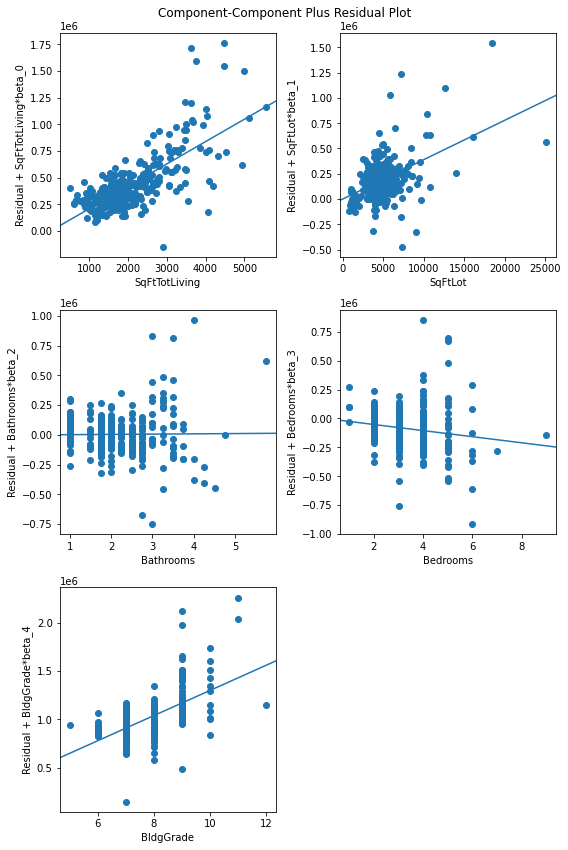

In [24]:
fig, ax = plt.subplots(figsize=(5, 5))
fig = sm.graphics.plot_ccpr(result_98105, 'SqFtTotLiving', ax=ax)

plt.tight_layout()
plt.show()

fig = plt.figure(figsize=(8, 12))
fig = sm.graphics.plot_ccpr_grid(result_98105, fig=fig)